In [ ]:
!pip install -q pyyaml h5py

In [ ]:
%matplotlib inline

import os
import shutil
import random

import numpy as np
import cv2

from PIL import Image, ImageOps
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import time


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/DR/',
                                          target_size=(128,128),
                                          batch_size=50,
                                          class_mode = 'categorical',
                                          subset = 'training')

valid_data = datagen.flow_from_directory('/content/DR/',
                                         target_size=(128,128),
                                         batch_size=50,
                                         class_mode = 'categorical',
                                         subset = 'validation')
train_data.class_indices

Found 3896 images belonging to 6 classes.
Found 973 images belonging to 6 classes.


{'.ipynb_checkpoints': 0,
 'Mild': 1,
 'Moderate': 2,
 'No_DR': 3,
 'Proliferate_DR': 4,
 'Severe': 5}

In [ ]:
!pip install -q efficientnet


     |████████████████████████████████| 51kB 4.8MB/s 


In [ ]:
import efficientnet.tfkeras as efn

In [ ]:
model5b = tf.keras.Sequential([
        efn.EfficientNetB3(
            input_shape=(128,128, 3),
            weights='imagenet',
            include_top=False
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
model5b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Functional) (None, 4, 4, 1536)        10783528  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 9222      
Total params: 10,792,750
Trainable params: 10,705,454
Non-trainable params: 87,296
_________________________________________________________________


In [ ]:
mcB3 = ModelCheckpoint('best_modelB3b.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model5b.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model5b.fit(train_data,
            validation_data = valid_data,
            
            epochs = 100,
            
            verbose = 1,
            callbacks = mcB3)

Epoch 1/100
78/78 [==============================] - ETA: 0s - loss: 1.4012 - acc: 0.4325
Epoch 00001: val_acc improved from -inf to 0.39671, saving model to best_modelB3b.h5
78/78 [==============================] - 36s 468ms/step - loss: 1.4012 - acc: 0.4325 - val_loss: 1.4082 - val_acc: 0.3967
Epoch 2/100
78/78 [==============================] - ETA: 0s - loss: 1.1414 - acc: 0.5200
Epoch 00002: val_acc improved from 0.39671 to 0.43679, saving model to best_modelB3b.h5
78/78 [==============================] - 35s 443ms/step - loss: 1.1414 - acc: 0.5200 - val_loss: 1.3202 - val_acc: 0.4368
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 1.0610 - acc: 0.5501
Epoch 00003: val_acc improved from 0.43679 to 0.50668, saving model to best_modelB3b.h5
78/78 [==============================] - 34s 441ms/step - loss: 1.0610 - acc: 0.5501 - val_loss: 1.1660 - val_acc: 0.5067
Epoch 4/100
78/78 [==============================] - ETA: 0s - loss: 0.9982 - acc: 0.5844
Epoch 00004: 

In [ ]:
new_model = tf.keras.models.load_model('best_modelB3b.h5')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Functional) (None, 4, 4, 1536)        10783528  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 9222      
Total params: 10,792,750
Trainable params: 10,705,454
Non-trainable params: 87,296
_________________________________________________________________


(128, 128, 3)
(1, 128, 128, 3)


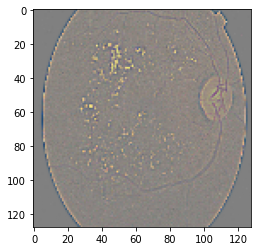

In [ ]:
img = cv2.imread('/content/severe1.png')
img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (128, 128))
new_array = new_array/255

print(new_array.shape)
x = np.expand_dims(new_array, axis=0)
print(x.shape)
plt.imshow(new_array)

In [ ]:
y = new_model.predict(x)
y_classes = y.argmax(axis=-1)
y_classes


array([5])